<a href="https://colab.research.google.com/github/anishatehim/STSCI3740FinalProject/blob/main/FinalCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

In [ ]:
appleStock = pd.read_csv("/content/sample_data/AAPL.csv")
samsungStock = pd.read_csv("/content/sample_data/Samsung Dataset.csv")
inflation = pd.read_csv("/content/sample_data/US CPI.csv")
federalFunds = pd.read_csv("/content/sample_data/federal_funds_rate.csv")
samsungStock = pd.read_csv("/content/sample_data/Samsung Dataset.csv")
SP500 = pd.read_csv("/content/sample_data/SP500.csv")

Rename Data Column

In [ ]:
appleStock.rename(columns={'date': 'Date'}, inplace=True)
appleStock['Date'] = appleStock['Date'].str.split(' ').str[0]
inflation.rename(columns={'Yearmon': 'Date'}, inplace=True)
federalFunds.rename(columns={'date': 'Date'}, inplace=True)
samsungStock.rename(columns={'date': 'Date'}, inplace=True)

Filter the Data: 2015 - 2020

In [ ]:
start_date = "2015-5-27"
end_date = "2020-12-31"

In [ ]:
appleStock = appleStock[(appleStock['Date'] >= start_date) & (appleStock['Date'] <= end_date)]
SP500 = SP500[(SP500['Date'] >= start_date) & (SP500['Date'] <= end_date)]
inflation = inflation[(inflation['Date'] >= start_date) & (inflation['Date'] <= end_date)]
federalFunds = federalFunds[(federalFunds['Date'] >= start_date) & (federalFunds['Date'] <= end_date)]
samsungStock = samsungStock[(samsungStock['Date'] >= start_date) & (samsungStock['Date'] <= end_date)]

Adjust Column Names

In [ ]:
appleStock.columns = ['Apple' + col if col != 'Date' else col for col in appleStock.columns]
SP500.columns = ['SP500' + col if col != 'Date' else col for col in SP500.columns]
inflation.columns = ['inflation' + col if col != 'Date' else col for col in inflation.columns]
federalFunds.columns = ['federalFunds' + col if col != 'Date' else col for col in federalFunds.columns]
samsungStock.columns = ['Samsung' + col if col != 'Date' else col for col in samsungStock.columns]

In [ ]:
combinedData = appleStock.merge(samsungStock, on='Date', how='outer') \
                        .merge(inflation, on='Date', how='outer') \
                        .merge(SP500, on='Date', how='outer') \
                        .merge(federalFunds, on='Date', how='outer')

combinedData = combinedData.sort_values('Date').reset_index(drop=True)
print(combinedData.head())

   AppleUnnamed: 0 Applesymbol        Date  Appleclose  Applehigh  Applelow  \
0              NaN         NaN  2016-01-01         NaN        NaN       NaN   
1            153.0        AAPL  2016-01-04      105.35    105.368    102.00   
2            154.0        AAPL  2016-01-05      102.71    105.850    102.41   
3            155.0        AAPL  2016-01-06      100.70    102.370     99.87   
4            156.0        AAPL  2016-01-07       96.45    100.130     96.43   

   Appleopen  Applevolume  AppleadjClose  AppleadjHigh  ...  SamsungAdj Close  \
0        NaN          NaN            NaN           NaN  ...               NaN   
1     102.61   67649387.0      97.940352     97.957086  ...      19584.482422   
2     105.75   55790992.0      95.486033     98.405185  ...      19633.232422   
3     100.56   68457388.0      93.617403     95.169946  ...      19096.900391   
4      98.68   81094428.0      89.666321     93.087494  ...      18901.871094   

   SamsungVolume  inflationCPI    SP50

In [ ]:
combinedData['AppleTarget'] = (combinedData['Appleclose'].shift(-1) > combinedData['Appleclose']).astype(int)

## Decision Tree

In [ ]:
features = ['Applehigh',
       'Applelow', 'Appleopen', 'Applevolume', 'AppledivCash',
       'ApplesplitFactor', 'SamsungOpen', 'SamsungHigh', 'SamsungLow',
       'SamsungClose', 'inflationCPI',
       'SP500Open', 'SP500High', 'SP500Low', 'SP500Close',
       'SP500Volume', 'federalFundsvalue']
target = ['AppleTarget']

In [ ]:
train_data, test_data = train_test_split(combinedData, test_size=0.2, random_state=42, shuffle=False)

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Initialize RandomForestClassifier with balanced class weights
model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrediction accuracy on test data: {accuracy * 100:.2f}%")


Prediction accuracy on test data: 77.19%


## Logistic Model

In [ ]:
imputer = SimpleImputer(strategy='median')
X_train_transform = imputer.fit_transform(X_train)
X_test_transform = imputer.transform(X_test)
model_log = LogisticRegression()
model_log.fit(X_train_transform, y_train)
y_pred_log = model_log.predict(X_test_transform)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7718631178707225


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['inflationCPI']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['inflationCPI']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Feature Selection


Most Important Features:
              Feature  Importance
15        SP500Volume    0.214091
3         Applevolume    0.137316
2           Appleopen    0.076975
6         SamsungOpen    0.074096
0           Applehigh    0.072904
7         SamsungHigh    0.065537
12          SP500High    0.065050
13           SP500Low    0.058862
9        SamsungClose    0.058311
1            Applelow    0.047909
14         SP500Close    0.046764
8          SamsungLow    0.042840
11          SP500Open    0.032891
16  federalFundsvalue    0.006455
10       inflationCPI    0.000000
5    ApplesplitFactor    0.000000
4        AppledivCash    0.000000


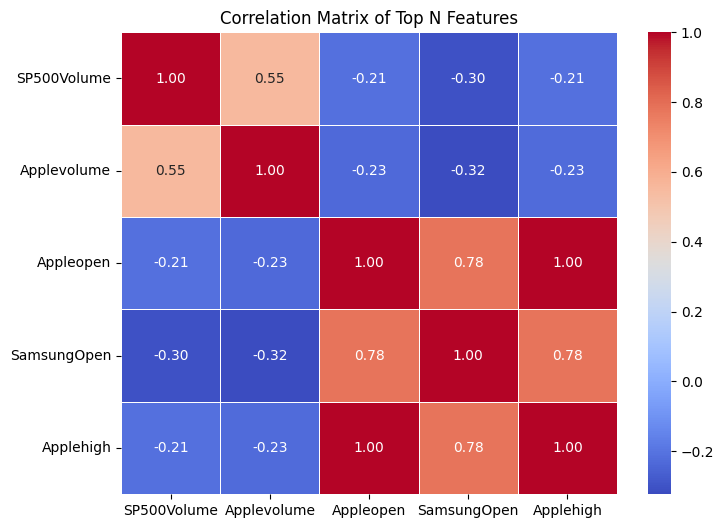

In [ ]:

feature_importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nMost Important Features:")
print(feature_importance_df)

top_n_features = feature_importance_df['Feature'].head(5)  # Modify '5' to get more/less features

X_train_top = X_train[top_n_features]
X_test_top = X_test[top_n_features]

correlation_matrix = X_train_top.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Top N Features")
plt.show()


## Random Forest Using Most Important Features

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Prediction accuracy on test data: 80.23%


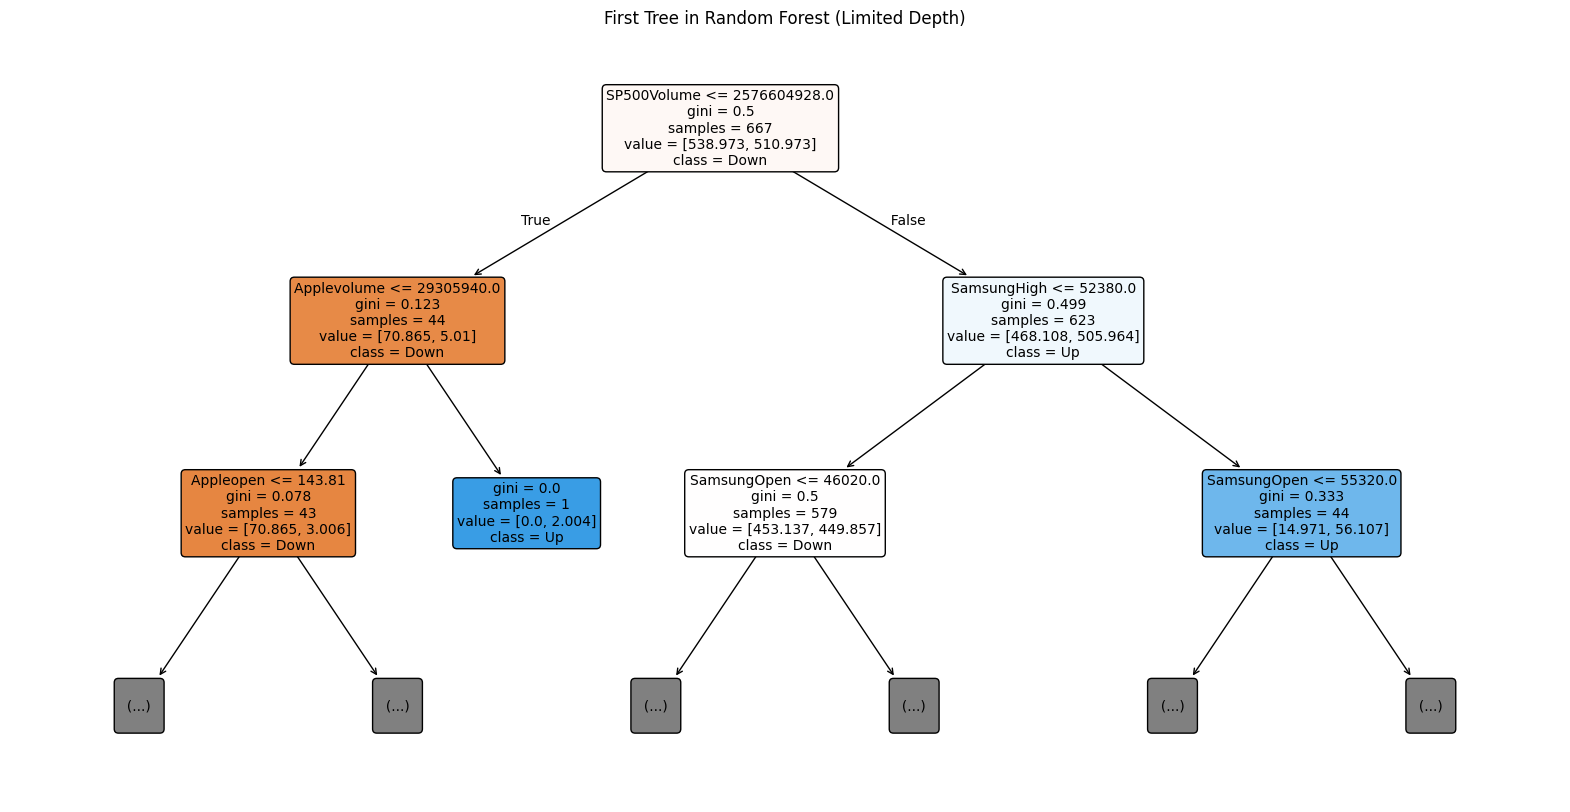

In [ ]:
features_new = ['SP500Volume', 'Applevolume', 'Appleopen', 'SamsungOpen', 'SamsungHigh']
target_new = ['AppleTarget']
train_data_new, test_data_new = train_test_split(combinedData, test_size=0.2, random_state=21, shuffle=False)

X_train_new = train_data_new[features_new]
y_train_new = train_data_new[target_new]
X_test_new = test_data_new[features_new]
y_test_new = test_data_new[target_new]

model_new = RandomForestClassifier(random_state=21, class_weight='balanced')

model_new.fit(X_train_new, y_train_new)

y_pred_new = model_new.predict(X_test_new)

accuracy_new = accuracy_score(y_test_new, y_pred_new)
print(f"\nPrediction accuracy on test data: {accuracy_new * 100:.2f}%")


plt.figure(figsize=(20,10))
plot_tree(model_new.estimators_[0],
          feature_names=features_new,
          class_names=['Down', 'Up'],
          filled=True,
          rounded=True,
          max_depth=2,  # Limit depth to make it more readable
          fontsize=10)
plt.title("First Tree in Random Forest (Limited Depth)")
plt.show()


Area Under Curve (AUC) Receiver Operating Characteristic (AUC)

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test_new, y_pred_new)
roc_auc = auc(fpr, tpr)
# Print AUC score
print(f"AUC: {roc_auc:.2f}")

AUC: 0.78
